In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as stats

In [2]:
def regions_confidence(df_, name="Confiabilidad_lash_mass", name1='mass', pass_1=0.01, name2='lash', pass_2=0.001): 
    lim_ini_1 = df_[name1].min()
    lim_fin_1 = df_[name1].max()
    lim_ini_2 = df_[name2].min()
    lim_fin_2 = df_[name2].max()
    
    x1_bins = np.arange(lim_ini_1,lim_fin_1,pass_1)
    x2_bins = np.arange(lim_ini_2,lim_fin_2,pass_2)
    #print(x1_bins)
    # Usar pd.cut() para crear etiquetas basadas en las columnas 'mass' y 'lash'
    df_['group_1'] = pd.cut(df_[name1], bins=x1_bins, labels=x1_bins[:-1], include_lowest=True)
    df_['group_2'] = pd.cut(df_[name2], bins=x2_bins, labels=x2_bins[:-1], include_lowest=True)
    df_['ratio'] = np.exp(-0.5*df_['chi'])
    
    indices_maximos = df_.groupby(['group_1','group_2'])['ratio'].idxmax()
    indices_maximos = indices_maximos.dropna()
    
    # Accede a las filas completas usando los índices máximos.
    data_maximo = df_.loc[indices_maximos]
    indice_max = df_['ratio'].idxmax()
    
    # Accede a la fila completa usando el índice.
    best_fit = df_.loc[indice_max]
    
    return data_maximo,best_fit

In [11]:
def graficar_confidence(fila_maxima,fm,X_,Y_,Z_,name1='mass',name2='lash',name="Confiabilidad mass vs lash"):
    fig, ax = plt.subplots(figsize=(10,7))
    niveles_confianza = [sigma_2_confianza, sigma_1_confianza]
    contour = plt.contour(X_,Y_,Z_,levels=niveles_confianza, colors='k')
    #contour = plt.contour(X_,Y_,Z_,levels=niveles_confianza, colors=['#91bfdb', '#FFA500'])
    
    im = ax.scatter(fm[name1],fm[name2],c=fm['ratio'],cmap='viridis')
    fig.colorbar(im)
    plt.scatter(fila_maxima[name1], fila_maxima[name2], c='red', marker='*', s=200, label='Max Exp')
    #plt.clabel(contour, inline=1, fontsize=10)
    plt.title(name)
    plt.ylabel(name2)
    plt.xlabel(name1)
    name_save = name + ".pdf"
    plt.savefig(name_save)
    plt.show()
    
def graficar(fila_maxima,fm,name1='mass',name2='lash',name="Confiabilidad mass vs lash"):
    fig, ax = plt.subplots(figsize=(10,7))
    #niveles_confianza = [sigma_2_confianza, sigma_1_confianza]
    #contour = plt.contour(X_,Y_,Z_,levels=niveles_confianza, colors=['#91bfdb', '#FFA500'])
    #plt.clabel(contour, inline=1, fontsize=10)
    im = ax.scatter(fm[name1],fm[name2],c=fm['ratio'],cmap='viridis')
    fig.colorbar(im)
    plt.scatter(fila_maxima[name1], fila_maxima[name2], c='red', marker='*', s=200, label='Max Exp')
    plt.title(name)
    plt.ylabel(name2)
    plt.xlabel(name1)
    name_save = name + ".pdf"
    plt.savefig(name_save)
    plt.show()

In [12]:
def contorno(df_,pass_1=0.01,pass_2=0.01):
    lim_ini_1 = df_['group_1'].min()
    lim_fin_1 = df_['group_1'].max()
    lim_ini_2 = df_['group_2'].min()
    lim_fin_2 = df_['group_2'].max()
    x1_bins = np.arange(lim_ini_1,lim_fin_1,pass_1)
    x2_bins = np.arange(lim_ini_2,lim_fin_2,pass_2)
    X_,Y_ = np.meshgrid(x1_bins,x2_bins)
    def funcion(x, y, df_):
        try:
            objeto = df_[df_['group_1'] == x]
            objeto = objeto[objeto['group_2'] == y]
            # Utiliza .values[0] en lugar de .value()
            valor = objeto['ratio'].values[0]
        except IndexError:  # Maneja la excepción específica para IndexError
            valor = 0
        return valor
    
    combinaciones = [(x, y) for y in x2_bins for x in x1_bins]

    # Crea un DataFrame con todas las combinaciones
    combinaciones_df = pd.DataFrame(combinaciones, columns=['group_1', 'group_2'])

    # Realiza una fusión (merge) con el DataFrame original (best1) para obtener los valores de ratio
    resultado_df = pd.merge(combinaciones_df, df_, on=['group_1', 'group_2'], how='left')

    # Llena los valores NaN con 0
    resultado_df['ratio'].fillna(0, inplace=True)

    # Reorganiza los datos en una matriz Z
    Z_ = resultado_df['ratio'].values.reshape(len(x2_bins), len(x1_bins))
    return X_,Y_,Z_

In [13]:
nombres = ['index','lash','mass','mu','cross_section','chi']
#Cargado de archivos
df1 = pd.read_csv("archivo_profile_randtobest1exp.csv",names=nombres)
df1 = df1.drop(columns=['index'])
df2 = pd.read_csv("archivo_profile.csv",names=nombres)
df2 = df2.drop(columns=['index'])

#Concatenando los archivos y reseteando valores.
df_concat = pd.concat([df1, df2], axis=0)
df_concat = df_concat.reset_index() #Reseteamos los indices del dataframe. 
df_concat = df_concat.drop_duplicates() #Eliminamos los datos duplicados.
df_concat = df_concat.drop(columns=['index'])

df_concat = df_concat[df_concat['mass'] > 1.5]
df_concat = df_concat[df_concat['mu'] < 3.61]
df_concat = df_concat[df_concat['mu']< 2*df_concat['mass']]

#df_concat

In [19]:
pass_1_int = 0.1
pass_2_int = 0.1
best,bp = regions_confidence(df_concat, name="Confiabilidad_lash_mass", name1='mass', pass_1=pass_1_int, name2='lash', pass_2=pass_2_int)

In [20]:
best = best.reset_index()
best = best.drop(columns=['index'])
best

,lash,mass,mu,cross_section,chi,group_1,group_2,ratio
0,-0.507108,1.592424,1.636456,5.316000e-07,2.825986e-07,1.500078,-0.590708,1.000000
1,-0.479244,1.568573,2.564467,6.728000e-07,4.526598e-07,1.500078,-0.490708,1.000000
2,-0.384554,1.509319,2.114950,1.357000e-06,4.056049e+00,1.500078,-0.390708,0.131595
3,-0.807715,1.698928,1.556928,8.237000e-08,2.764446e+00,1.600078,-0.890708,0.251020
4,-0.718407,1.688954,0.337488,1.300000e-07,1.690000e-08,1.600078,-0.790708,1.000000
...,...,...,...,...,...,...,...,...
201,-0.265296,3.115330,3.207563,1.525000e-09,2.325625e-12,3.100078,-0.290708,1.000000
202,-0.180023,3.193960,3.249543,1.573000e-09,2.474329e-12,3.100078,-0.190708,1.000000
203,-0.191082,3.209968,3.400387,1.389000e-09,7.010023e-01,3.200078,-0.290708,0.704335
204,-0.172440,3.209968,3.400387,1.513000e-09,2.289169e-12,3.200078,-0.190708,1.000000


In [21]:
X,Y,Z = contorno(best,pass_1=pass_1_int,pass_2=pass_2_int)

grades = 2  # Grados de libertad
sigma_1 = 0.6827
#sigma_1 = 0.7633995091158048
sigma_2 = 0.9545
sigma_1_confianza = stats.chi2.ppf((1-sigma_1), df=2)
sigma_2_confianza = stats.chi2.ppf((1-sigma_2), df=2)

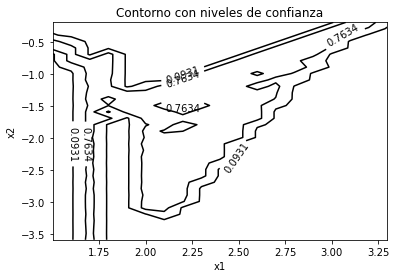

In [22]:
niveles_confianza = [sigma_2_confianza,sigma_1_confianza]
contour = plt.contour(X,Y,Z,levels=niveles_confianza, colors='k')
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Contorno con niveles de confianza")
plt.show()

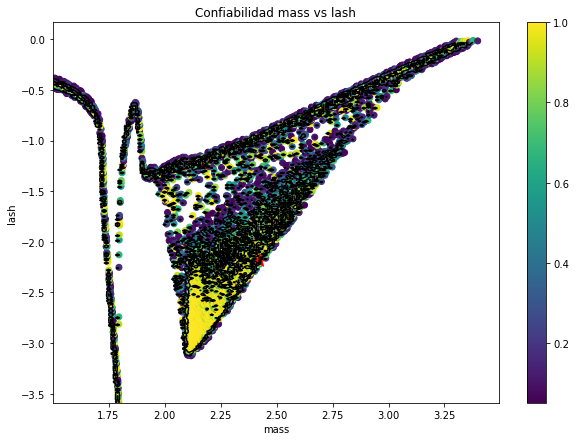

In [18]:
graficar_confidence(bp,best,X,Y,Z)